## Preprocessing of Text 

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [189]:
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import json
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import distance

In [83]:
def remove_character():
    with open('frequency_of_character.json') as json_file:
        character_frequency = json.load(json_file)

    remove_character_list = []
    for key, value in character_frequency['0'].items():
        if value < 1500:
            remove_character_list.append(key)
    return remove_character_list

In [84]:
STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
          .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
          .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
          .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
          .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
          .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
          .replace("€", " euro ").replace("'ll", " will").replace("¢", " cent ").replace("¥", " yen ")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        example1 = BeautifulSoup(x)
        x = example1.get_text()
        x = porter.stem(x)
        
    for char in remove_character():
        x = x.replace(char, " ")
        
    return x
    

In [85]:
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")
stopwords.remove("no")
#stopwords.remove("like")

In [86]:
def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)
    return df

In [56]:
train_df = pd.read_csv("train.csv")
train_df = extract_features(train_df)

In [125]:
train_df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonely  how can i solve...   
4   4     9    10  which one dissolve in water quikly sugar  salt...   

                                           question2  is_duplicate  
0  what is the step by step guide to invest in sh...             0  
1  what would happen if the indian government sto...             0  
2  how can internet speed be increased by hacking...             0  
3  find the remainder when  math 23  24   math  i...             0  
4            which fish would survive in salt water              0

In [199]:
is_duplicate = train_df["is_duplicate"].to_list()
advance_features_id = train_df["id"].to_list()

In [58]:
frequency_of_character = {}
for question1, question2 in zip(train_df["question1"].to_list(), train_df["question2"].to_list()):
    for c in str(question1).lower():
        if c in frequency_of_character:
            frequency_of_character[c] += 1
        else:
            frequency_of_character[c] = 1
    for c in str(question2).lower():
        if c in frequency_of_character:
            frequency_of_character[c] += 1
        else:
            frequency_of_character[c] = 1
            
print(frequency_of_character)

{'w': 1288729, 'h': 2081499, 'a': 3347768, 't': 3229637, ' ': 9472138, 'i': 3038954, 's': 2410101, 'e': 4360926, 'p': 833706, 'b': 607469, 'y': 790243, 'g': 782874, 'u': 999488, 'd': 1408068, 'o': 3276885, 'n': 2610468, 'v': 376359, 'r': 2231037, 'm': 1047097, 'k': 348797, 'f': 785055, 'l': 1408915, 'c': 1219415, '2': 47750, '3': 19867, '4': 15162, 'q': 60578, 'x': 86232, '0': 67425, 'j': 68731, '1': 64094, 'z': 30464, '9': 8721, '5': 29023, '8': 8950, '6': 19214, '7': 12579}


In [197]:
train_df.to_csv('clean_train_df.csv')

## Plotting Word clouds

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [90]:
# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
list_of_duplicate_questions = np.dstack([train_df[train_df['is_duplicate'] == 1]['question1'].to_list()
               , train_df[train_df['is_duplicate'] == 1]['question2'].to_list()]).flatten()
list_of_not_duplicate_questions = np.dstack([train_df[train_df['is_duplicate'] == 0]['question1'].to_list()
                                     , train_df[train_df['is_duplicate'] == 0]['question2'].to_list()]).flatten()

In [91]:
len(list_of_duplicate_questions), len(list_of_not_duplicate_questions)

(298526, 510054)

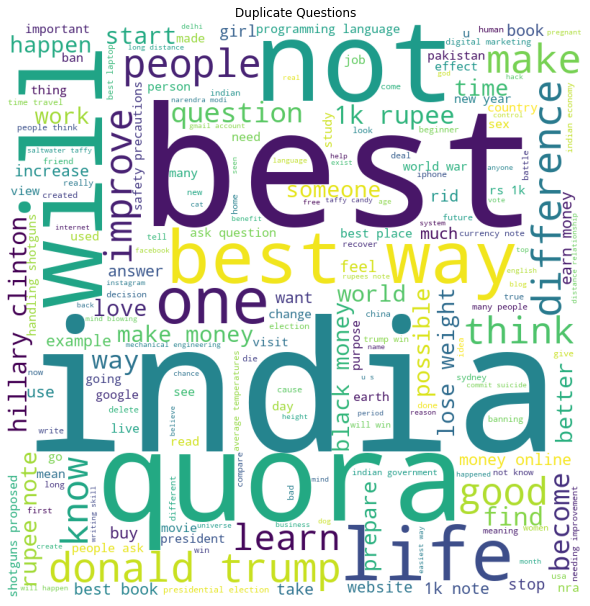

In [92]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate("".join([ str(word) for word in list_of_duplicate_questions]))
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Duplicate Questions")
plt.show()

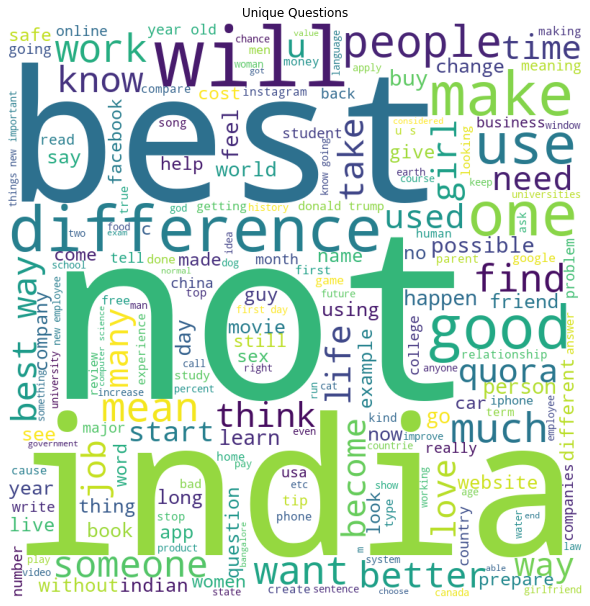

In [93]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate("".join([ str(word) for word in list_of_not_duplicate_questions]))
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Unique Questions")
plt.show()

## Advance feature 

Based on the root features which are mentioned below:
- __Tokens__: count of words based on the split by white space
- __Stop words__: mentioned in the STOP_WORDS set
- __Words__: difference in token-stop words

- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br><b>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))</b>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br><b>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))</b>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br><b>csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))</b>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br><b>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))</b>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br><b>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))</b>
- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br><b>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))</b>
- __last_word_eq__ :  Check if First word of both questions is equal or not<br><b>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])</b>
- __first_word_eq__ :  Check if First word of both questions is equal or not<br><b>first_word_eq = int(q1_tokens[0] == q2_tokens[0])</b>
- __abs_len_diff__ :  Abs. length difference<br><b>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))</b>
- __mean_len__ :  Average Token Length of both Questions<br><b>mean_len = (len(q1_tokens) + len(q2_tokens))/2</b>
- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br><b>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))</b>


In [60]:
list_of_question1 = train_df["question1"].to_list()
list_of_question2 = train_df["question2"].to_list()

In [98]:
token_question1 = [str(word).split(' ')[:-1] for word in list_of_question1]
token_question2 = [str(word).split(' ')[:-1] for word in list_of_question2]

In [127]:
stop_word_question1 = []
stop_word_question2 = []

for question1, question2 in zip(token_question1, token_question2):
    stop_word1 = set()
    for word in question1:
        if word in stopwords:
            stop_word1.add(word)
    stop_word_question1.append(stop_word1)

    stop_word2 = set()
    for word in question2:
        if word in stopwords:
            stop_word2.add(word)
    stop_word_question2.append(stop_word2)


In [128]:
word_question1 = []
word_question2 = []

for question1, question2 in zip(token_question1, token_question2):
    word1 = set()
    for word in question1:
        if word not in stopwords:
            word1.add(word)
    word_question1.append(word1)
    word2 = set()
    for word in question2:
        if word not in stopwords:
            word2.add(word)
    word_question2.append(word2)


In [134]:
# common_word_count_min = [(len(set(word1).intersection(set(word2))))/(min(len(word1), len(word2)))
#                          if len(set(word1).intersection(set(word2))) != 0 else 0
#                          for words1, words2 in zip(word_question1, word_question2)]
common_word_count_min = []
for i in range(len(word_question1)):
    if len(word_question1[i].intersection(word_question2[i])) != 0:
        min_ratio = len(word_question1[i].intersection(word_question2[i]))/(min(len(word_question1[i]), len(word_question2[i])))
        common_word_count_min.append(min_ratio)
    else:
        common_word_count_min.append(0)

In [139]:
common_word_count_max = []
for i in range(len(word_question1)):
    if len(word_question1[i].intersection(word_question2[i])) != 0:
        max_ratio = len(word_question1[i].intersection(word_question2[i]))/(max(len(word_question1[i]), len(word_question2[i])))
        common_word_count_max.append(max_ratio)
    else:
        common_word_count_max.append(0)
        

In [140]:
common_stop_count_min = []
for i in range(len(stop_word_question1)):
    if len(stop_word_question1[i].intersection(stop_word_question2[i])) != 0:
        min_ratio = len(stop_word_question1[i].intersection(stop_word_question2[i]))/(min(len(stop_word_question2[i]), len(stop_word_question2[i])))
        common_stop_count_min.append(min_ratio)
    else:
        common_stop_count_min.append(0)
        

In [142]:
common_stop_count_max = []
for i in range(len(stop_word_question1)):
    if len(stop_word_question1[i].intersection(stop_word_question2[i])) != 0:
        max_ratio = len(stop_word_question1[i].intersection(stop_word_question2[i]))/(max(len(stop_word_question2[i]), len(stop_word_question2[i])))
        common_stop_count_max.append(max_ratio)
    else:
        common_stop_count_max.append(0)
        

In [144]:
common_token_count_min = []
for i in range(len(token_question1)):
    if len(set(token_question1[i]).intersection(set(token_question2[i]))) != 0:
        min_ratio = len(set(token_question1[i]).intersection(set(token_question2[i])))/(min(len(token_question1[i]), len(token_question2[i])))
        common_token_count_min.append(min_ratio)
    else:
        common_token_count_min.append(0)


In [146]:
common_token_count_max = []
for i in range(len(token_question1)):
    if len(set(token_question1[i]).intersection(set(token_question2[i]))) != 0:
        max_ratio = len(set(token_question1[i]).intersection(set(token_question2[i])))/(max(len(token_question1[i]), len(token_question2[i])))
        common_token_count_max.append(max_ratio)
    else:
        common_token_count_max.append(0)

In [172]:
is_first_token_match = [int(token1[0] == token2[0]) if token1 and token2 else 0 
                        for token1, token2 in zip(token_question1, token_question2)]


In [178]:
is_last_token_match = [int(token1[-1] == token2[-1]) if token1 and token2 else 0 
                       for token1, token2 in zip(token_question1, token_question2)]


In [180]:
mean_token = [(len(token1)+ len(token2))/2 for token1, token2 in zip(token_question1, token_question2)]

In [182]:
fuzz_ratio = [fuzz.ratio(" ".join([str(word) for word in token1]), 
                         " ".join([str(word) for word in token2])) 
              for token1, token2 in zip(token_question1, token_question2)]

In [185]:
fuzz_partial_ratio = [fuzz.partial_ratio(" ".join([str(word) for word in token1]), 
                         " ".join([str(word) for word in token2])) 
              for token1, token2 in zip(token_question1, token_question2)]

In [186]:
fuzz_sort_ratio = [fuzz.token_sort_ratio(" ".join([str(word) for word in token1]), 
                         " ".join([str(word) for word in token2])) 
              for token1, token2 in zip(token_question1, token_question2)]


In [187]:
fuzz_set_ratio = [fuzz.token_set_ratio(" ".join([str(word) for word in token1]), 
                         " ".join([str(word) for word in token2])) 
              for token1, token2 in zip(token_question1, token_question2)]



In [192]:

lcs_token_min = [(len(distance.lcsubstrings(" ".join([str(word) for word in token1]), 
                         " ".join([str(word) for word in token2]))))/min(len(token1), len(token2)) 
                 if len(distance.lcsubstrings(" ".join([str(word) for word in token1]), 
                         " ".join([str(word) for word in token2]))) != 0 else 0
                 for token1, token2 in zip(token_question1, token_question2)]


In [200]:
advance_features_dict = {
    "common_word_count_min": common_word_count_min,
    "common_word_count_max": common_word_count_max,
    "common_stop_count_min": common_stop_count_min,
    "common_stop_count_max": common_stop_count_max,
    "common_token_count_min": common_token_count_min,
    "common_token_count_max": common_token_count_max,
    "is_first_token_match": is_first_token_match,
    "is_last_token_match": is_last_token_match,
    "mean_token": mean_token,
    "fuzz_ratio": fuzz_ratio,
    "fuzz_partial_ratio": fuzz_partial_ratio,
    "fuzz_sort_ratio": fuzz_sort_ratio,
    "fuzz_set_ratio": fuzz_set_ratio,
    "lcs_token_min": lcs_token_min,
    "is_duplicate": is_duplicate,
    "id": advance_features_id
}
training_feature_df = pd.DataFrame(data=advance_features_dict)
training_feature_df.shape

(404290, 16)

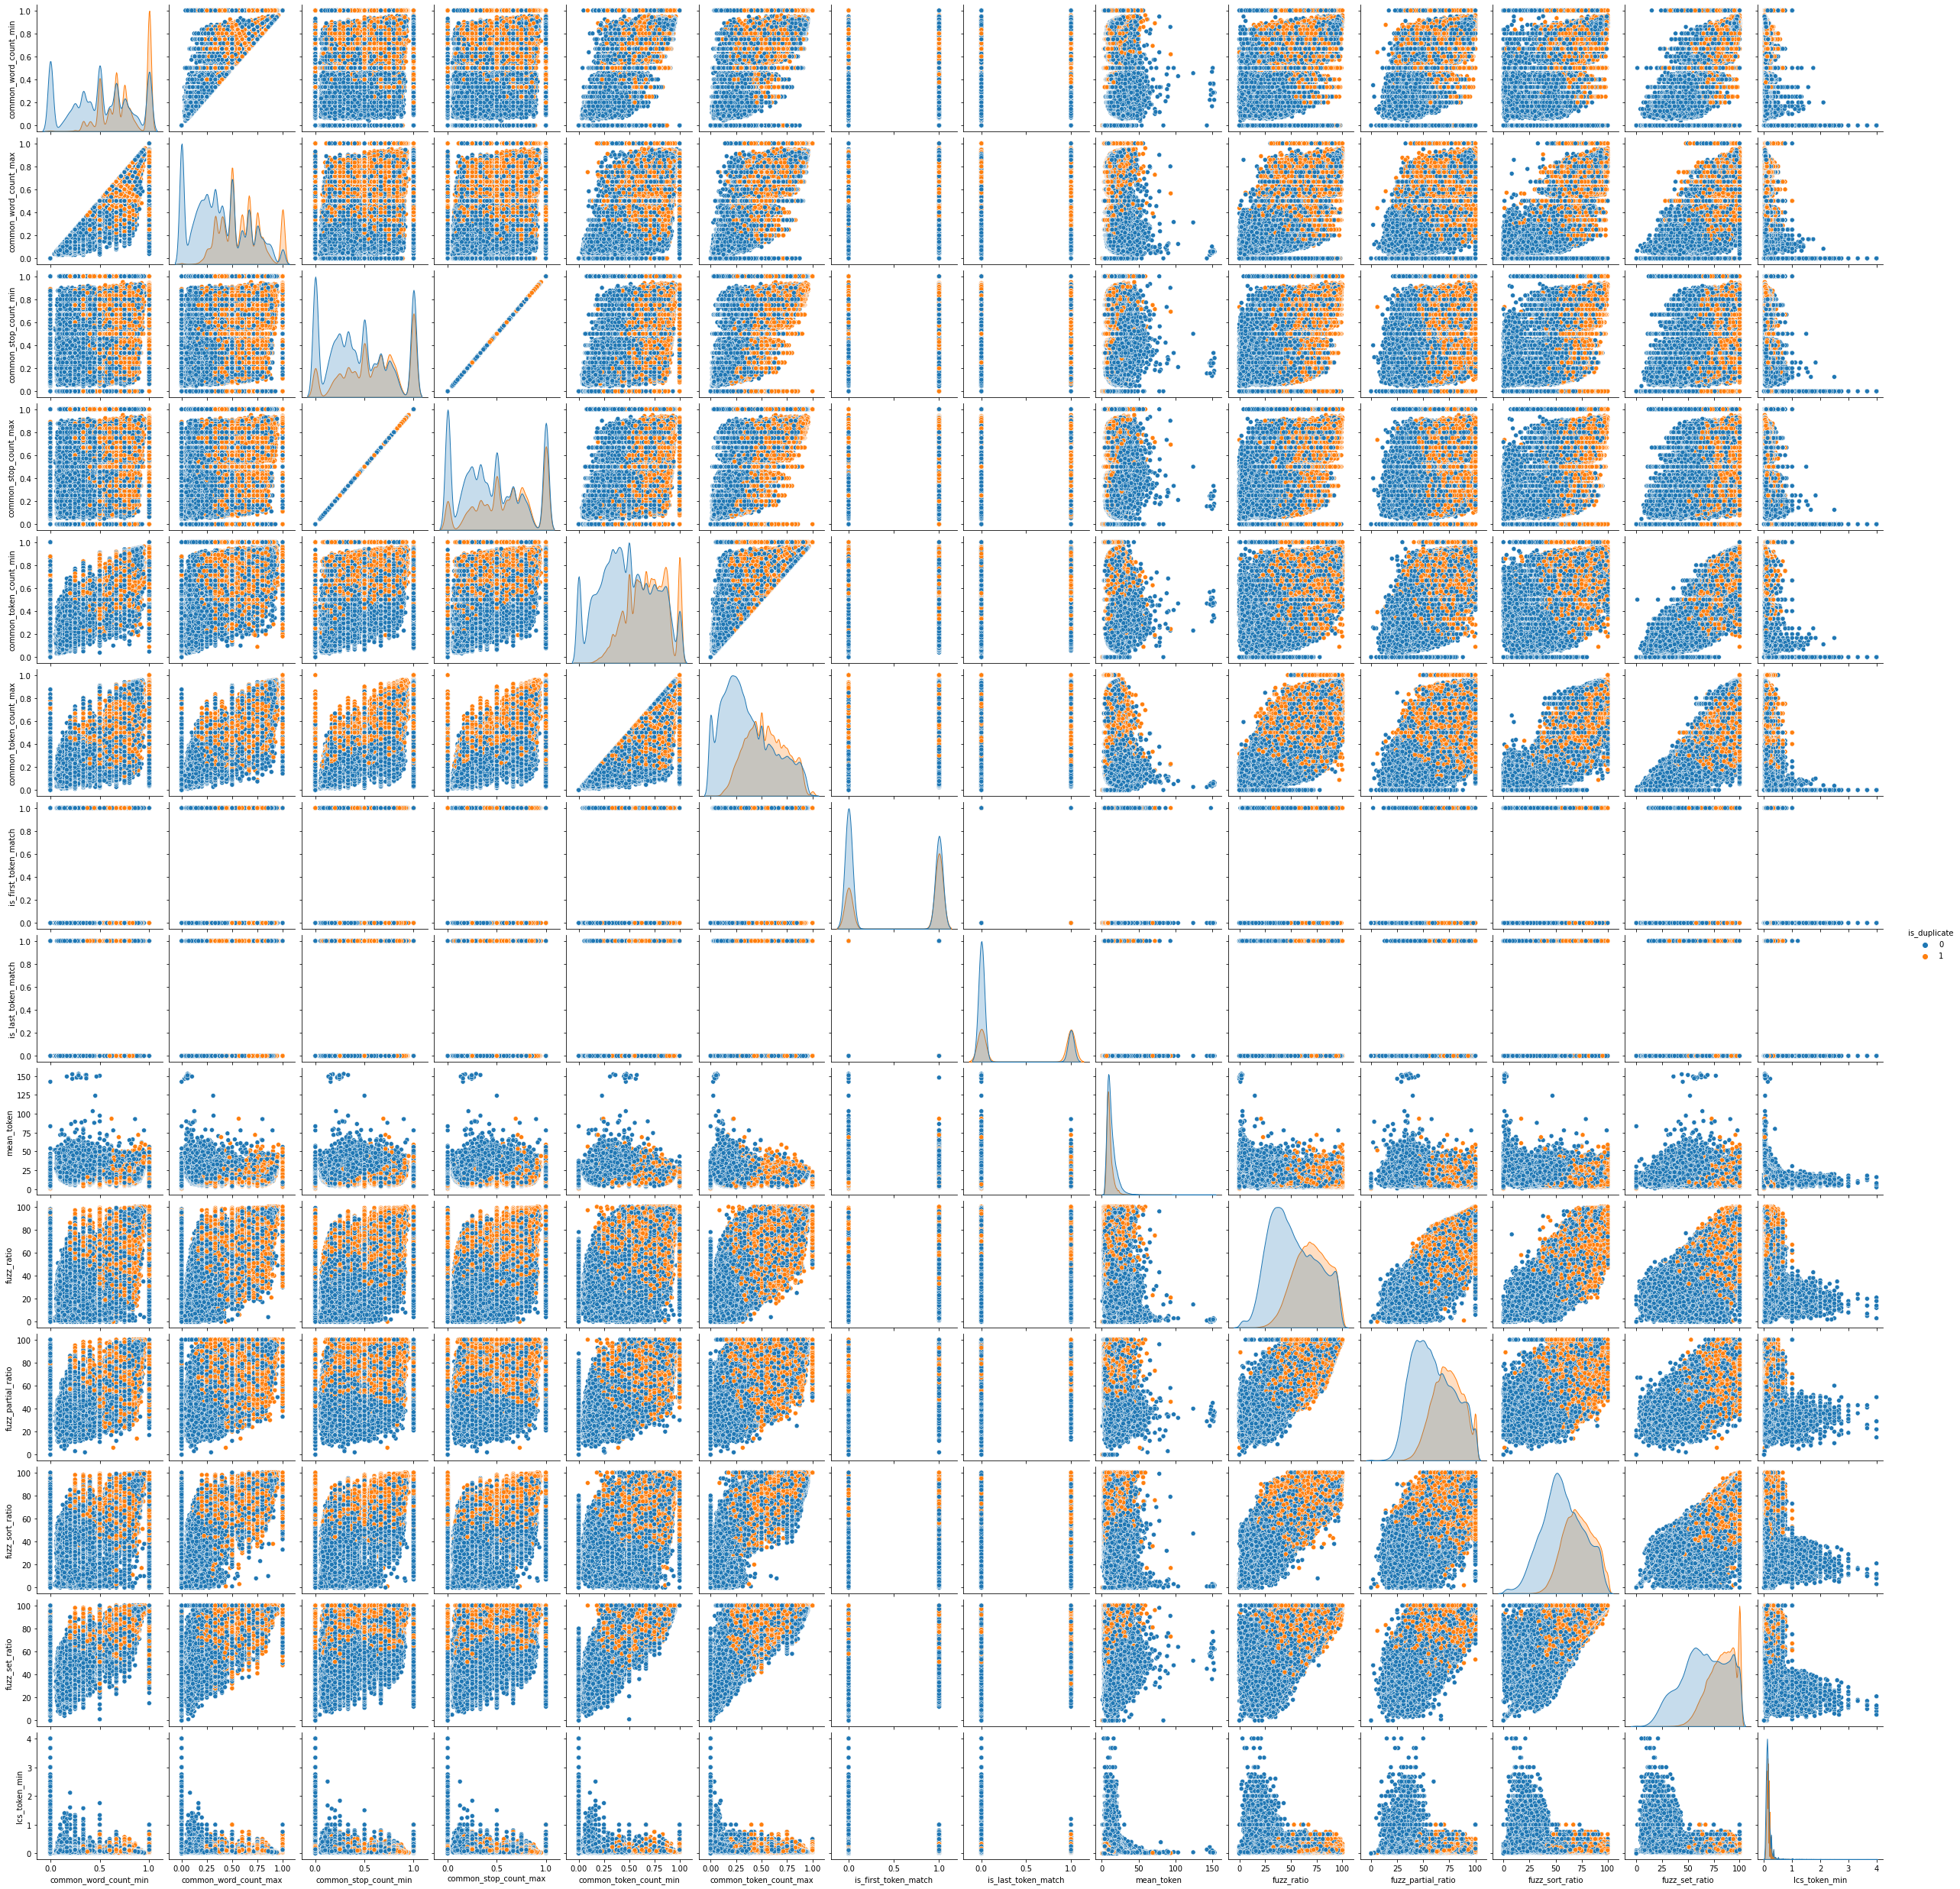

In [195]:
sns.pairplot(training_feature_df, hue='is_duplicate')

In [201]:
training_feature_df.to_csv('training_advance_feature.csv')